# Importing job posts in to a pandas data frame

In [80]:
import pandas as pd
import zipfile
from io import BytesIO
from bs4 import BeautifulSoup

# read the contents
with zipfile.ZipFile('/content/sample_data/job_postings.zip', 'r') as zip_ref:
    html_files = zip_ref.namelist()
    job_content = {}
    for i, html_file in enumerate(html_files):
        with zip_ref.open(html_file, 'r') as file:
            content = file.read().decode('utf-8')
            #soup = BeautifulSoup(file, 'html.parser')
            #text = soup.get_text().strip()
            job_content[str(i)] = [content]

          
# Convert the dictionary to a pandas data frame
df_all_content = pd.DataFrame.from_dict(job_content)



In [81]:
df_all_content.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '1448', '1449', '1450', '1451', '1452', '1453', '1454', '1455', '1456',
       '1457'],
      dtype='object', length=1458)

In [82]:
pd.set_option('display.max_colwidth', 1000)

In [83]:
df_all_content['10']

0    <html><head><title>Data and Reporting Analyst - Olympia, WA 98501</title></head>\n<body><h2>Data and Reporting Analyst - Olympia, WA 98501</h2>\n<p>The Washington Health Benefit Exchange is a public-private partnership that operates the WAPlanfinder mobile app and Washington Healthplanfinder, the eligibility and enrollment portal used by one in four Washington residents to obtain health and dental coverage. Through Washington Healthplanfinder, individuals and families can compare and enroll in health insurance coverage and gain access to financial help and public programs like Washington Apple Health.</p>\n<p></p><p>The mission of the Exchange, a state-based marketplace, is to radically improve how Washington residents secure health insurance through innovative and practical solutions, an easy-to-use customer experience, our values of integrity, respect, equity and transparency, and by providing undeniable value to the health care community.</p>\n<p></p><p>The Exchange is also com

In [84]:
df_all_content['100']

0    <html><head><title>Salesforce Administrator - Seal Beach, CA</title></head>\n<body><h2>Salesforce Administrator - Seal Beach, CA</h2>\n<h2 class="jobSectionHeader"><b>Overview\n</b></h2><div><div><div><div>The Salesforce Administrator will support and partner with management to conduct daily administration of multiple user setup, profiles and roles; customization of objects, fields, record types, page layouts, automated email management, and validations. Other functions include strategic planning, staff analysis and end-users to create and manage complex workflow rules, data validation, and triggers.</div>\n</div></div></div><h2 class="jobSectionHeader"><b>Responsibilities\n</b></h2><div><div><div><ul><li><div>Work with sales operations, business stakeholders, and technical personnel to understand, develop, and document clear requirements within SalesforceDesign, implement, document, build, test and deploy updates and enhancements within Salesforce, in adherence to industry best p

In [85]:
df_all_content['1000']

0    <html><head><title>Machine Learning Software Engineer - RecosPlatform - San Francisco, CA 94103</title></head>\n<body><h2>Machine Learning Software Engineer - RecosPlatform - San Francisco, CA 94103</h2>\n<div><div><div><div><div><p><b>Who We Are:</b></p>\n<p>\nRecos Platform team builds recommendations infrastructures such as candidate generation and feature generation engines for product service areas. The unrivaled challenges that we face at Twitter are both the data scale and the real-time nature of the product. How do you find the most meaningful content among hundreds of millions of new tweets for hundreds of millions of users every day at Twitter? We build large scale personalized recommendation engines utilizing different kinds of signals such as social network, user activity, and geo location. Most of our work is about graph algorithms, recommendation systems, machine learning, distributed systems, and social graph analysis.</p><br/>\n<p></p>\n<p><b>\nWhat You’ll Do:</b><

# Get the titles of the postings

In [86]:
#Write a function to get the job titles as a dictionary
from bs4 import BeautifulSoup
import pandas as pd

def job_titles(df):
    titles = {}
    for col in df.columns:
        content = str(df[col][0]) #first element in the series
        soup = BeautifulSoup(content, 'html.parser')
        title_tags = soup.find_all('title')
        if title_tags:
            title = title_tags[0].get_text(separator=' ') #get first title match
            title_parts = title.split(' - ') #split the title at - to get the actual job title 
            if len(title_parts) > 0:
                titles[col] = title_parts[0] # create a dictionary of job-number:title 
    return titles

In [87]:
all_titles=job_titles(df_all_content) #grt the job titles as a dictionary

In [88]:
len(all_titles)

1458

In [89]:
all_titles

{'0': 'Political Staffer',
 '1': 'Data Scientist',
 '2': 'Data Scientist',
 '3': 'Data Scientist',
 '4': 'Patient Care Assistant / PCA',
 '5': 'Data Manager / Analyst',
 '6': 'Scientific Programmer',
 '7': 'JD Digits',
 '8': 'Operations and Technology Summer 2020 Internship-West Coast',
 '9': 'PwC Labs',
 '10': 'Data and Reporting Analyst',
 '11': 'Senior Manager Advanced Analytics',
 '12': 'Data Specialist, Product Support Operations',
 '13': 'Deep Learning Engineer',
 '14': 'Research Intern, 2020',
 '15': 'Senior Data Scientist',
 '16': 'Analytical Lead',
 '17': 'Data Scientist',
 '18': 'Data Scientist',
 '19': 'Interlibrary Projects Assistant (6760C) 27525',
 '20': 'Strategy Analyst',
 '21': 'Data Scientist',
 '22': 'Data Scientist, Natural Language Processing (NLP), descriptive statistics, statistical modelling, machine learning',
 '23': 'Software Developer',
 '24': 'Critical Targeting Network Analyst 2',
 '25': 'Impact and Learning Manager',
 '26': 'Software Engineering Intern',
 

# Ggroup the jobs with respect to their titles to eliminate unrelated posts 

In [90]:
titles_dict=job_titles(df_all_content) #get the titles dictionary

# Select the jobs that have specific keywords and create 2 data frames. 
keywords = ['Data', 'data', 'AI', 'ML', 'Machine Learning','Engineer', 'Scientist','Analyst',
            'Analytics','Natural Language','Siri']

selected_cols=[]
unselected_cols=[]

for col in df_all_content.columns:
  if any(keyword.lower() in titles_dict[col].lower() for keyword in keywords):
    selected_cols.append(col)
  else:
    unselected_cols.append(col)

df_selected_all_content = df_all_content[selected_cols]
df_unselected_all_content=df_all_content[unselected_cols]

In [91]:
print(df_all_content.shape)
print(df_selected_all_content.shape)
print(df_unselected_all_content.shape)

(1, 1458)
(1, 1059)
(1, 399)


In [92]:
#pd.set_option('display.max_colwidth', 200)

In [93]:
#call job_titles function to check selected and unselected titles

unselected_titles=job_titles(df_unselected_all_content)
unselected_titles

{'0': 'Political Staffer',
 '4': 'Patient Care Assistant / PCA',
 '6': 'Scientific Programmer',
 '7': 'JD Digits',
 '8': 'Operations and Technology Summer 2020 Internship-West Coast',
 '9': 'PwC Labs',
 '14': 'Research Intern, 2020',
 '16': 'Analytical Lead',
 '19': 'Interlibrary Projects Assistant (6760C) 27525',
 '23': 'Software Developer',
 '25': 'Impact and Learning Manager',
 '31': 'Santa Clara 4-H Community Ed Specialist 3',
 '36': 'Director of Econometric Modeling',
 '39': 'Postdoctoral Position – Cheminformatics Team',
 '44': 'Scorekeeper',
 '46': 'TECHNICAL INFORMATION SPECIALIST (WEB SERVICES)',
 '49': 'Research Associate',
 '53': 'Computational Chemist',
 '58': 'Admissions Associate PT',
 '60': 'Director of Marketing Statistics',
 '61': 'Manager- Financial Consulting Valuation Services',
 '68': 'Financial Advisory Services Complex Financial Instruments Senior Associate',
 '70': 'Decision Science Manager (Facebook App)',
 '71': 'Corporate Control Management',
 '74': 'Certifie

In [94]:
selected_titles=job_titles(df_selected_all_content)
selected_titles

{'1': 'Data Scientist',
 '2': 'Data Scientist',
 '3': 'Data Scientist',
 '5': 'Data Manager / Analyst',
 '10': 'Data and Reporting Analyst',
 '11': 'Senior Manager Advanced Analytics',
 '12': 'Data Specialist, Product Support Operations',
 '13': 'Deep Learning Engineer',
 '15': 'Senior Data Scientist',
 '17': 'Data Scientist',
 '18': 'Data Scientist',
 '20': 'Strategy Analyst',
 '21': 'Data Scientist',
 '22': 'Data Scientist, Natural Language Processing (NLP), descriptive statistics, statistical modelling, machine learning',
 '24': 'Critical Targeting Network Analyst 2',
 '26': 'Software Engineering Intern',
 '27': 'Quantitative Business Analyst, Geo',
 '28': 'Data Scientist',
 '29': 'Senior Machine Learning (ML) and Computer Vision (CV) Engineer',
 '30': 'Data Science Intern',
 '32': 'Data Analytics Instructor',
 '33': 'Data Scientist',
 '34': 'Data Scientist',
 '35': 'Data Scientist',
 '37': 'Data Scientist III',
 '38': 'Data Analyst',
 '40': 'Technical Trainer',
 '41': 'Data Scienti

# all text content of the postings

In [95]:
#extarct all  text content of selected posts and create a new data frame df1_selected_content

all_content_text={} 

# iterate through the columns selected posts to extarxt the text with BeautifulSoup
for col in df_selected_all_content.columns:
    # extract the content of the columns
    content=str(df_selected_all_content[col][0]) #df0_selected[col][0].to_string()
    soup = BeautifulSoup(content, 'html.parser')
    content = soup.get_text(separator=' ')
    all_content_text[col]=[content]
    # create new DataFrame for extracted content 
df_selected_all_text=pd.DataFrame.from_dict(all_content_text)

In [96]:
df_selected_all_text.shape

(1, 1059)

In [97]:
df_selected_all_text['1000']

0    Machine Learning Software Engineer - RecosPlatform - San Francisco, CA 94103 \n Machine Learning Software Engineer - RecosPlatform - San Francisco, CA 94103 \n Who We Are: \n \nRecos Platform team builds recommendations infrastructures such as candidate generation and feature generation engines for product service areas. The unrivaled challenges that we face at Twitter are both the data scale and the real-time nature of the product. How do you find the most meaningful content among hundreds of millions of new tweets for hundreds of millions of users every day at Twitter? We build large scale personalized recommendation engines utilizing different kinds of signals such as social network, user activity, and geo location. Most of our work is about graph algorithms, recommendation systems, machine learning, distributed systems, and social graph analysis. \n \n \nWhat You’ll Do: \n \nYou are focusing on the heavy software engineering required for building large-scale Machine Learning a

In [98]:
#Read the resume content.
with open('/content/sample_data/resume.txt', 'r') as file:
    content = file.read()
df_selected_all_text['resume']=[content]
df_selected_all_text['resume']

0    Experience\n\n1. Developed probability simulations using NumPy.\n2. Assessed online ad-clicks for statistical significance using Permutation testing.\n3. Analyzed disease outbreaks using common clustering algorithms.\n\nAdditional Skills\n\n1. Data visualization using Matplotlib.\n2. Statistical analysis using SciPy.\n3. Processing structured tables using Pandas.\n4. Executing K-Means clustering and DBSCAN clustering using Scikit-Learn.\n5. Extracting locations from text using GeonamesCache.\n6. Location analysis and visualization using GeonamesCache and Basemap.\n7. Dimensionality reduction with PCA and SVD, using Scikit-Learn.\n8. NLP analysis and text topic detection using Scikit-Learn.
Name: resume, dtype: object

In [99]:
#Remove newline charaters and non-text characters nad numericals from each column 
df_selected_all_text_clean=df_selected_all_text.copy()
import re
#df_selected_content = df_selected_content.reset_index(drop=True)
for col in df_selected_all_text_clean.columns:
  content=str(df_selected_all_text_clean[col][0]).replace('\n', ' ').replace('-', ' ').strip().lower()
  # Remove non-ASCII characters
  content = re.sub(r'[^\x00-\x7F]+', ' ', content)
  df_selected_all_text_clean[col]=re.sub(r'[^\w\s]|[\d]', ' ', content)



In [100]:
df_selected_all_text_clean['10'][0]

'data and reporting analyst   olympia  wa         data and reporting analyst   olympia  wa         the washington health benefit exchange is a public private partnership that operates the waplanfinder mobile app and washington healthplanfinder  the eligibility and enrollment portal used by one in four washington residents to obtain health and dental coverage  through washington healthplanfinder  individuals and families can compare and enroll in health insurance coverage and gain access to financial help and public programs like washington apple health    the mission of the exchange  a state based marketplace  is to radically improve how washington residents secure health insurance through innovative and practical solutions  an easy to use customer experience  our values of integrity  respect  equity and transparency  and by providing undeniable value to the health care community    the exchange is also committed to identify and reach groups at risk for obstacles to access coverage  wh

# Find initial cosine similarities between all job content and resume 


In [101]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

#Form a list of the job contents from the first row of the 
list_of_selected_jobs = df_selected_all_text_clean.iloc[0].tolist() 

# Calculate the TF-IDF ??? Should resume be include in 'fit method'??????
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(list_of_selected_jobs)

# find cosine similarity between each column and the 'resume' column
cosine_similarities = cosine_similarity(tfidf_matrix, tfidf_matrix[-1])

print("list_of_selected_jobs length: ",len(list_of_selected_jobs))
print("tfidf_matrix shape: ", tfidf_matrix.shape)

cosine_similarities

list_of_selected_jobs length:  1060
tfidf_matrix shape:  (1060, 14362)


array([[0.13971849],
       [0.05081331],
       [0.03844961],
       ...,
       [0.04904269],
       [0.01863991],
       [1.        ]])

In [102]:
cosine_similarities.shape

(1060, 1)

In [103]:
cosine_similarities[:, -1] #get all the cosine similarities of the last column (which is the single column)

array([0.13971849, 0.05081331, 0.03844961, ..., 0.04904269, 0.01863991,
       1.        ])

# Sort cosine similarityies to print

In [104]:
import numpy as np
# get indices of sorted similarities
sorted_indices = np.argsort(cosine_similarities[:, -1])[::-1] #descending order 
print('lngth of sorted_indices:',len(sorted_indices))

# remove indices with cosine similarity less than 0.02
filtered_indices = sorted_indices[cosine_similarities[sorted_indices, -1] >= 0.02]
print('lenght filtered_indices: ', len(filtered_indices))


# get the columns names of the filtered indeces
filtered_cols = df_selected_all_text_clean.columns[filtered_indices]

#print column names and cosine similarities
for col, sim in zip(filtered_cols, cosine_similarities[filtered_indices, -1]):
   print(f"{col}: {sim}")


lngth of sorted_indices: 1060
lenght filtered_indices:  813
resume: 1.0000000000000002
1135: 0.15519894699480172
1: 0.1397184947630427
28: 0.1353403303651091
1051: 0.1337448637277559
588: 0.13288854123464816
616: 0.12847734794111154
936: 0.1236265987671986
35: 0.12174259856234333
736: 0.12031053870290456
1441: 0.11914333751008294
204: 0.11204777727696472
546: 0.11071423368980121
744: 0.10987865248054236
1236: 0.10986048995515219
50: 0.10921944273758702
885: 0.1092045341699327
213: 0.10751970424896846
449: 0.10722433198018855
409: 0.10562464590898893
173: 0.10416050452722274
52: 0.10150002460926974
1112: 0.10020167132097146
800: 0.09824218422984252
931: 0.0982186788769766
1404: 0.09812812575278658
1289: 0.09778505045033009
1030: 0.09722076549749417
1360: 0.09626720718591877
224: 0.09595522630777965
293: 0.09474239283735979
845: 0.09460823675116391
741: 0.09447308987084817
868: 0.09203775197396387
642: 0.09148662653492756
1080: 0.09085600672928278
751: 0.09052850390544236
1227: 0.0888739

In [105]:
df_selected_all_text_clean['1135'][0]

'chief data officer   culver city  ca         chief data officer   culver city  ca        metro goldwyn mayer studios inc    mgm   is seeking a chief data officer who will support our product  sales  leadership and marketing teams with insights gained from analyzing data  the ideal candidate is adept at using large data sets to find opportunities for product and process optimization and using models to test the effectiveness of different courses of action  they must have strong experience using a variety of data mining data analysis methods  using a variety of data tools  building and implementing models  using creating algorithms and creating running simulations  they must have a proven ability to drive business results with their data based insights  they must be comfortable working with a wide range of stakeholders and functional teams  the right candidate will have a passion for discovering solutions hidden in large data sets and working with stakeholders to improve business outcom

In [106]:
selected_titles['1135']

'Chief Data Officer'

In [107]:
df_selected_all_text_clean['resume'][0]

'experience     developed probability simulations using numpy     assessed online ad clicks for statistical significance using permutation testing     analyzed disease outbreaks using common clustering algorithms   additional skills     data visualization using matplotlib     statistical analysis using scipy     processing structured tables using pandas     executing k means clustering and dbscan clustering using scikit learn     extracting locations from text using geonamescache     location analysis and visualization using geonamescache and basemap     dimensionality reduction with pca and svd  using scikit learn     nlp analysis and text topic detection using scikit learn '

# Create a list of selected job content to cluster them


In [108]:
# Create a list of selected job content to cluster them
selected_posts_all_text = []

for col in df_selected_all_text_clean.iloc[:, :-1]: #ignore the last column which contains  the resume
    content = df_selected_all_text_clean[col][0]
    selected_posts_all_text.append(content)

In [109]:
print(len(selected_posts_all_text))
selected_posts_all_text[0]

1059


'data scientist   beavercreek  oh   data scientist   beavercreek  oh   data scientist   position overview    centauri is looking for a detail oriented  motivated  and organized data scientist to work as part of a team to clean  analyze  and produce insightful reporting on government data  the ideal candidate is adept at using large data sets to find trends for intelligence reporting and will be proficient in process optimization and using models to test the effectiveness of different courses of action  they must have strong experience using a variety of data mining data analysis methods  using a variety of data tools  building and implementing models  using creating algorithms and producing easily understood visuals to represent findings  candidate will work closely with data managers and stakeholders to tailor their analysis to answer key questions  the candidate must have a strong understanding of geographic information systems  gis  and statistical analysis    responsibilities    us

# CountVectorizer

In [110]:
from sklearn.feature_extraction.text import CountVectorizer

#CountVectorizer
count_vectorizer = CountVectorizer(stop_words='english') #

# Fit and transform the job list
sparse_counts = count_vectorizer.fit_transform(selected_posts_all_text) #selected_posts= lsit of content of selected jbs 
sparse_counts_arry=sparse_counts.toarray()
# list of all words
countvectorizer_all_words = count_vectorizer.get_feature_names_out()
print(len(countvectorizer_all_words))
print(' '.join(countvectorizer_all_words))

14357
_prescribednondiscriminationpostinglanguage_jrfqa _w aa aaa aaai aae aag aai aam aamhr aap ab abb abbreviated abd abet abide abides abilities ability abilty able abm abnormal abnormally aboutindy abreast abroad absence absent absolute absolutely absorbing absorption abstract abstraction abstractions abstractive abstracts abundant abuse abusive ac academia academic academically academicjobsonline academics academy acams acat accel accelerate accelerated accelerates accelerating acceleration accelerator accelerators accelerometers accenture accept acceptability acceptable acceptance accepted accepting access accesses accessibility accessible accessing accession accessioned accessories accident accidental accommodate accommodates accommodating accommodation accommodations accompanying accomplish accomplished accomplishes accomplishing accomplishment accomplishments accordance according accordingly account accountabilities accountability accountable accounted accounting accounts accr

# #TfidfVectorizer

In [111]:
from sklearn.feature_extraction.text import TfidfVectorizer

# use TfidfVectorizer to transform the job postings 
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
selected_posts_tfidf = tfidf_vectorizer.fit_transform(selected_posts_all_text)
selected_posts_tfidf

<1059x14357 sparse matrix of type '<class 'numpy.float64'>'
	with 266920 stored elements in Compressed Sparse Row format>

In [112]:
tfidf_all_words =tfidf_vectorizer.get_feature_names_out()
print(len(tfidf_all_words))
print(' '.join(tfidf_all_words))

14357
_prescribednondiscriminationpostinglanguage_jrfqa _w aa aaa aaai aae aag aai aam aamhr aap ab abb abbreviated abd abet abide abides abilities ability abilty able abm abnormal abnormally aboutindy abreast abroad absence absent absolute absolutely absorbing absorption abstract abstraction abstractions abstractive abstracts abundant abuse abusive ac academia academic academically academicjobsonline academics academy acams acat accel accelerate accelerated accelerates accelerating acceleration accelerator accelerators accelerometers accenture accept acceptability acceptable acceptance accepted accepting access accesses accessibility accessible accessing accession accessioned accessories accident accidental accommodate accommodates accommodating accommodation accommodations accompanying accomplish accomplished accomplishes accomplishing accomplishment accomplishments accordance according accordingly account accountabilities accountability accountable accounted accounting accounts accr

# CountVectorizer and TfidfVectorizer generate same tokens!!!

In [113]:
print(countvectorizer_all_words == tfidf_all_words) #Countvectorizer and tfidf has same tokens 

[ True  True  True ...  True  True  True]


In [114]:
print(sum(countvectorizer_all_words == tfidf_all_words))

14357


# Find the best number of clusters using KMeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


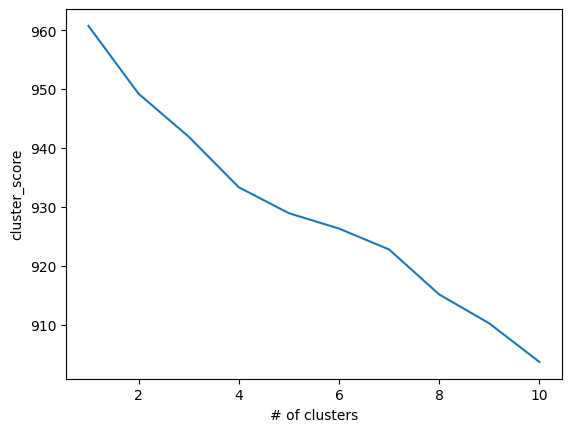

In [115]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# try a range of cluster number for elbow method
cluster_score = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(selected_posts_tfidf)
    cluster_score.append(kmeans.inertia_)

plt.plot(range(1, 11), cluster_score)
plt.xlabel('# of clusters')
plt.ylabel('cluster_score')
plt.show()


# n=3 ???       number of clusters

In [150]:
#N=5
#Choose n_clusters=5 and clsuter the skills 
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, n_init=10)
kmeans.fit(selected_posts_tfidf)

KMeans(n_clusters=5, n_init=10)

# Use Countvectorizer tokens to disply wordCloud of each cluster


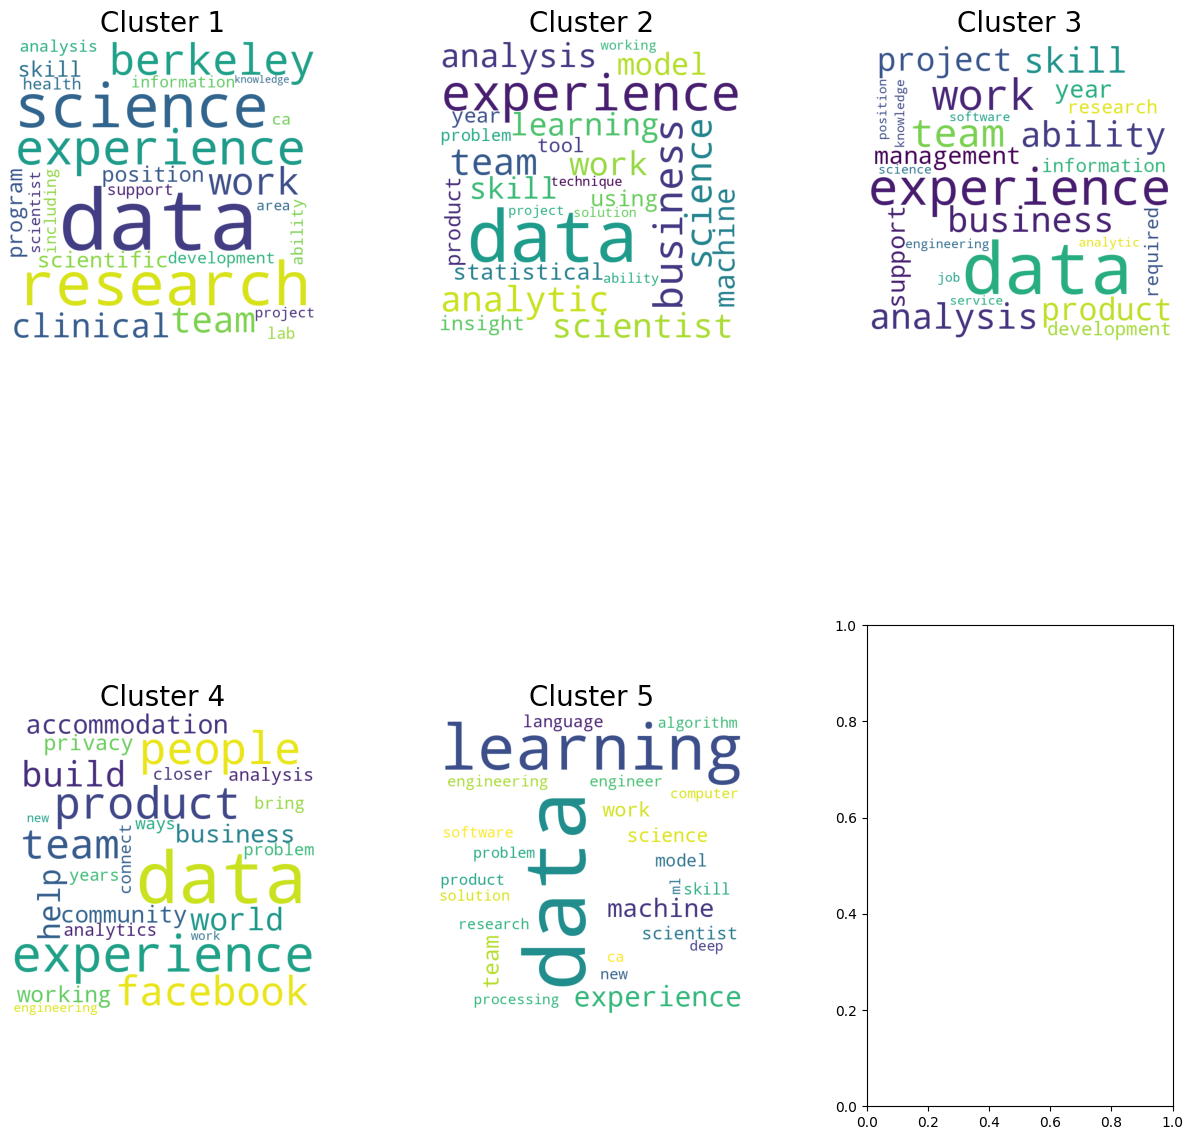

In [153]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
#Create CountVectorizer tokens
#CountVectorizer
count_vectorizer = CountVectorizer(stop_words='english') #
# Fit and transform the job list
sparse_counts = count_vectorizer.fit_transform(selected_posts_all_text) #selected_posts= lsit of content of selected jbs 
sparse_counts_arry=sparse_counts.toarray()
# list of all words
all_words = count_vectorizer.get_feature_names_out()
############
fig, axs = plt.subplots(2, 3, figsize=(15,15))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
axs = axs.ravel()
#####################
# create a WordCloud fro each cluster and plot
for i in range(5):
    #cluster_words = []
    cluster_text=''
    for j in range(len(selected_posts_all_text)):
        if kmeans.labels_[j] == i:
          # Get the last row (document) of the count matrix as an array
          job_word_counts = sparse_counts_arry[j]

          # Get the word counts for each job and re-produce the job content. 
          job_text =' '.join( [str(all_words[k] + ' ')*job_word_counts[k] for k in range(len(all_words)) if job_word_counts[k] > 0])
          cluster_text = cluster_text + ' '+ job_text

    wordcloud = WordCloud(width=600, height=600, background_color='white', max_words=25, contour_width=3, 
                          contour_color='steelblue',collocations=False).generate(cluster_text)
    axs[i].imshow(wordcloud)
    axs[i].set_title(f"Cluster {i+1}", fontsize=20, pad=5)
    axs[i].axis('off')
    
plt.show()

# LISTED CONTENT 

In [119]:
df_selected_all_listed=df_selected_all_content.copy()
df_selected_all_listed['1'][0]

'<html><head><title>Data Scientist - Beavercreek, OH</title></head>\n<body><h2>Data Scientist - Beavercreek, OH</h2>\n<p><b>Data Scientist</b></p>\n<p><b>Position Overview:</b></p>\n<p>Centauri is looking for a detail oriented, motivated, and organized Data Scientist to work as part of a team to clean, analyze, and produce insightful reporting on government data. The ideal candidate is adept at using large data sets to find trends for intelligence reporting and will be proficient in process optimization and using models to test the effectiveness of different courses of action. They must have strong experience using a variety of data mining/data analysis methods, using a variety of data tools, building and implementing models, using/creating algorithms and producing easily understood visuals to represent findings. Candidate will work closely with Data Managers and stakeholders to tailor their analysis to answer key questions. The candidate must have a strong understanding of Geographic 

In [120]:
#Read resume and add to the dataframe 
with open('/content/sample_data/resume.txt', 'r') as file:
    content = file.read()
    df_selected_all_listed['resume']=[content]

In [121]:
len(df_selected_all_listed.columns)

1060

# Listed items content

In [122]:
import pandas as pd
from bs4 import BeautifulSoup

# An empty dictionary for the lsited content
list_items = {}

# From each column
for col in df_selected_all_listed.columns:
    # read the content
    html_content = df_selected_all_listed[col][0]
    # Parse it using Beautiful Soup
    soup = BeautifulSoup(html_content, 'html.parser')
    uls = soup.find_all('ul')    #find unordered lists
    content = ''                 # create a empty string to join all listed content per posting
    if not uls:                  #Some posts DO NOT have listed content 
      content=soup.get_text(separator=' ')
    else:
      for ul in uls:
        lis = ul.find_all('li') #list items within an ordered or unordered list
        for li in lis:
          text = li.get_text(separator=' ')
          content =content +' '+ text
    list_items[col]=[content]          #store everything temporarily in a dictionary to convert it to a data frame 

df_selected_all_listed_text=pd.DataFrame.from_dict(list_items)

In [123]:
len(df_selected_all_listed_text.columns)

1060

In [124]:
df_selected_all_listed_text['resume']

0    Experience\n\n1. Developed probability simulations using NumPy.\n2. Assessed online ad-clicks for statistical significance using Permutation testing.\n3. Analyzed disease outbreaks using common clustering algorithms.\n\nAdditional Skills\n\n1. Data visualization using Matplotlib.\n2. Statistical analysis using SciPy.\n3. Processing structured tables using Pandas.\n4. Executing K-Means clustering and DBSCAN clustering using Scikit-Learn.\n5. Extracting locations from text using GeonamesCache.\n6. Location analysis and visualization using GeonamesCache and Basemap.\n7. Dimensionality reduction with PCA and SVD, using Scikit-Learn.\n8. NLP analysis and text topic detection using Scikit-Learn.
Name: resume, dtype: object

In [125]:
#Remove newline charaters and non-text characters
df_selected_all_listed_text_clean=df_selected_all_listed_text.copy() #make a copy of the data frame before cleaning the text 
import re
for col in df_selected_all_listed_text_clean.columns:
  content=str(df_selected_all_listed_text_clean[col][0]).replace('\n', '  ').replace('-', '  ').strip().lower()
  # Remove non-ASCII characters
  content = re.sub(r'[^\x00-\x7F]+', ' ', content)
  df_selected_all_listed_text_clean[col]=re.sub(r'[^\w\s]|[\d]', ' ', content)

In [126]:
df_selected_all_listed_text_clean['resume']

0    experience       developed probability simulations using numpy      assessed online ad  clicks for statistical significance using permutation testing      analyzed disease outbreaks using common clustering algorithms     additional skills       data visualization using matplotlib      statistical analysis using scipy      processing structured tables using pandas      executing k  means clustering and dbscan clustering using scikit  learn      extracting locations from text using geonamescache      location analysis and visualization using geonamescache and basemap      dimensionality reduction with pca and svd  using scikit  learn      nlp analysis and text topic detection using scikit  learn 
Name: resume, dtype: object

In [127]:
df_selected_all_listed_text_clean['1'][0]

'use statistical research methods to analyze datasets produced through multiple sources of intelligence production mine and analyze data from databases to answer key intelligence questions assess the effectiveness and accuracy of new data sources and data gathering techniques develop custom data models and algorithms to apply to data sets use predictive modeling to produce reporting about future trends based on historical data spatially analyze geographic data using gis tools visualize findings in easily understood graphics and aesthetically appealing finished reports experience using statistical computer languages  r  python  slq  etc   to manipulate data and draw insights from large data sets experience in basic visualization methods  especially using tools such as tableau  ggplot  and matplotlib knowledge of a variety of machine learning techniques  clustering  decision tree learning  artificial neural networks  etc   and their real  world advantages drawbacks knowledge of advanced 

# COsine similarity of listed items content

In [128]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Create a list of job posts from the first row of the dataframe
selected_all_listed_text_clean = df_selected_all_listed_text_clean.iloc[0].tolist()

# Calculate the TF-IDF vectors
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(selected_all_listed_text_clean)

# Calculate the cosine similarity between each column and the 'resume' column
cosine_similarities2 = cosine_similarity(tfidf_matrix, tfidf_matrix[-1])

print("selected_all_listed_text_clean length: ",len(selected_all_listed_text_clean))
print("tfidf_matrix shape: ", tfidf_matrix.shape)
print("tfidf_matrix[-1] shape: ", tfidf_matrix[-1].shape)
print()
cosine_similarities2

selected_all_listed_text_clean length:  1060
tfidf_matrix shape:  (1060, 11043)
tfidf_matrix[-1] shape:  (1, 11043)



array([[0.11536231],
       [0.07542853],
       [0.05082274],
       ...,
       [0.04889382],
       [0.01475166],
       [1.        ]])

In [129]:
cosine_similarities2.shape

(1060, 1)

# sort cosine similarities 

In [130]:
import numpy as np
# get indices of sorted similarities
sorted_indices2 = np.argsort(cosine_similarities2[:, -1])[::-1] #descending order 
print('sorted_indices2:',len(sorted_indices2))

# remove indices with cosine similarity less than 0.02
filtered_indices2 = sorted_indices[cosine_similarities2[sorted_indices2, -1] >= 0.02]
print('filtered_indices2: ', len(filtered_indices2))

# get the corresponding column names from the dataframe
filtered_cols2 = df_selected_all_listed_text_clean.columns[filtered_indices2]

# print sorted similarities and corresponding column names
for col, sim in zip(filtered_cols2, cosine_similarities2[filtered_indices2, -1]):
    print(f"{col}: {sim}")

sorted_indices2: 1060
filtered_indices2:  818
resume: 1.0000000000000002
1135: 0.15760220853183826
1: 0.11536231109547869
28: 0.10940693840748869
1051: 0.14202574359992798
588: 0.09983378037135363
616: 0.12707848091213528
936: 0.1285324787210603
35: 0.08721714320826311
736: 0.14400242511892913
1441: 0.22183384045978183
204: 0.11246653013672402
546: 0.12192994894614
744: 0.14698841730097195
1236: 0.22012381202466985
50: 0.1252708861660915
885: 0.019457049140610392
213: 0.09979488320472094
449: 0.11017322447150123
409: 0.11965172683239446
173: 0.1428568226039214
52: 0.1428568226039214
1112: 0.08509375886030128
800: 0.09458471415874685
931: 0.09762557934041334
1404: 0.09762557934041334
1289: 0.13242054468885978
1030: 0.0987124309258818
1360: 0.1227011934173654
224: 0.11959489167093344
293: 0.11548457087218769
845: 0.10624982731652963
741: 0.1161264965366221
868: 0.08178915960811431
642: 0.10450408331912608
1080: 0.06583408703761995
751: 0.09035697711876726
1227: 0.11000053900423831
548: 0

# Create a list of jobs to cluster them


In [131]:
selected_all_listed_text_clean = df_selected_all_listed_text_clean.iloc[0].tolist()
selected_all_listed_text_clean2=selected_all_listed_text_clean[:-1] #exlude resume

In [132]:
print(len(selected_all_listed_text_clean2))
selected_all_listed_text_clean2[0]

1059


'use statistical research methods to analyze datasets produced through multiple sources of intelligence production mine and analyze data from databases to answer key intelligence questions assess the effectiveness and accuracy of new data sources and data gathering techniques develop custom data models and algorithms to apply to data sets use predictive modeling to produce reporting about future trends based on historical data spatially analyze geographic data using gis tools visualize findings in easily understood graphics and aesthetically appealing finished reports experience using statistical computer languages  r  python  slq  etc   to manipulate data and draw insights from large data sets experience in basic visualization methods  especially using tools such as tableau  ggplot  and matplotlib knowledge of a variety of machine learning techniques  clustering  decision tree learning  artificial neural networks  etc   and their real  world advantages drawbacks knowledge of advanced 

In [133]:
from sklearn.feature_extraction.text import TfidfVectorizer

# use TfidfVectorizer to transform the job postings 
vectorizer2 = TfidfVectorizer(stop_words='english')
selected_posts3_tfidf = vectorizer2.fit_transform(selected_all_listed_text_clean2)
selected_posts3_tfidf

<1059x11038 sparse matrix of type '<class 'numpy.float64'>'
	with 166027 stored elements in Compressed Sparse Row format>

# Cluster skills2

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


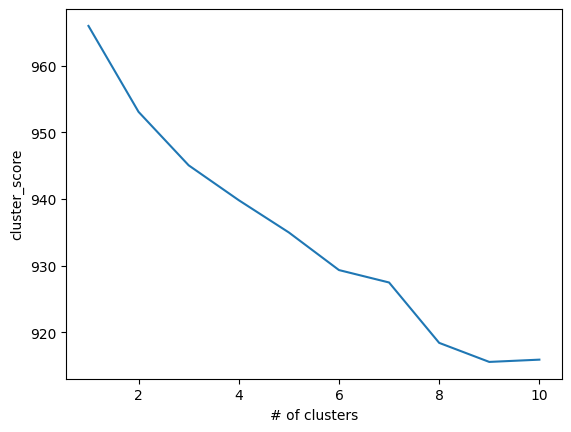

In [134]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# try a range of cluster numbers foir the elbow method. 
cluster_score2 = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(selected_posts3_tfidf)
    cluster_score2.append(kmeans.inertia_)

plt.plot(range(1, 11), cluster_score2)
plt.xlabel('# of clusters')
plt.ylabel('cluster_score')
plt.show()


# n=3 ???       number of clusters

In [135]:
#N=6
#Choose n_clusters=6 and clsuter the skills 
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6, n_init=10)
kmeans.fit(selected_posts3_tfidf)


KMeans(n_clusters=6, n_init=10)

Disply wordCloud of each cluster

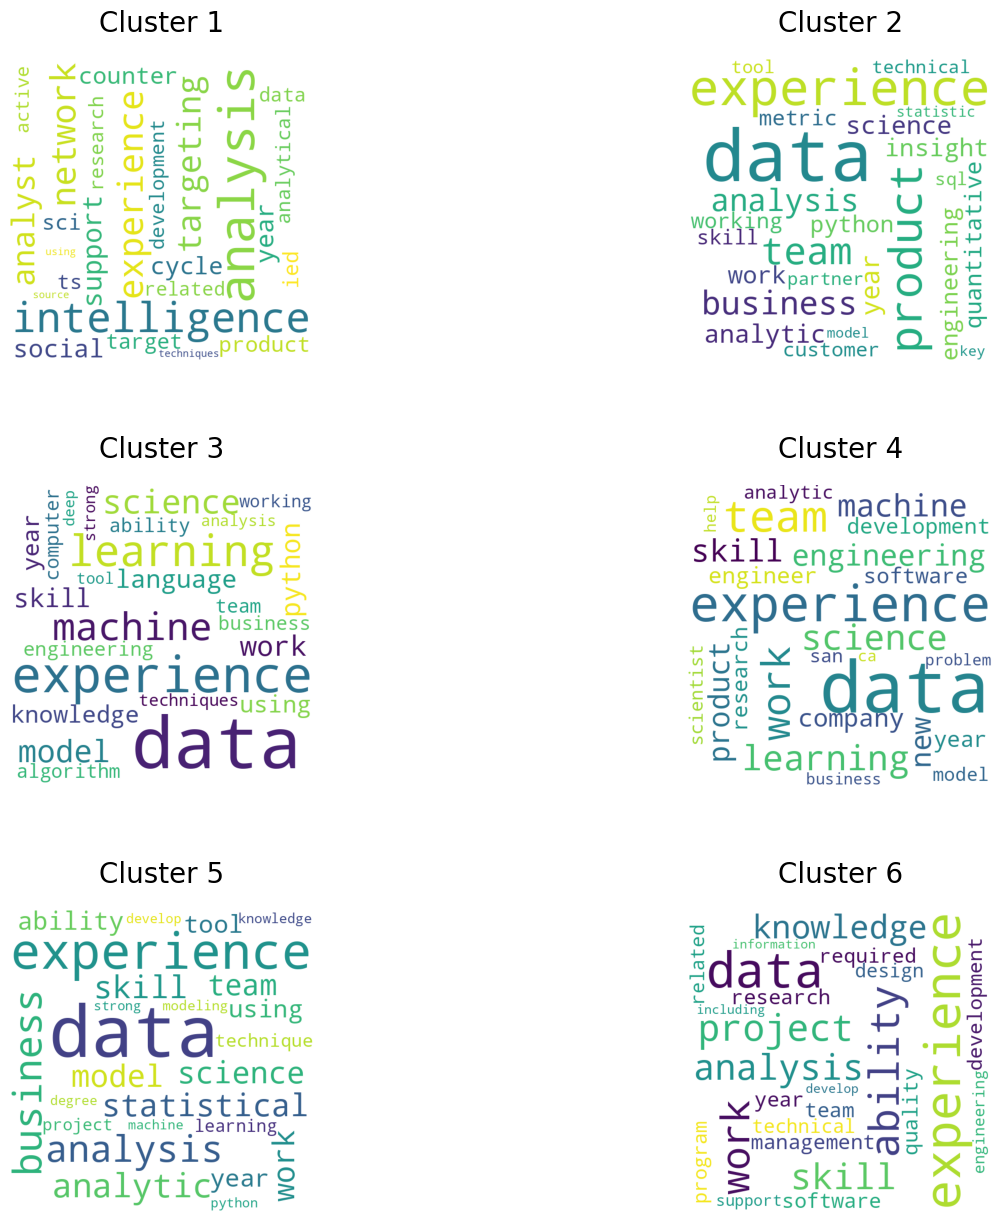

In [136]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
#Create CountVectorizer tokens 
#CountVectorizer
count_vectorizer2 = CountVectorizer(stop_words='english') #
# Fit and transform the job list
sparse_counts2 = count_vectorizer2.fit_transform(selected_all_listed_text_clean2) #selected_posts= lsit of content of selected jbs 
sparse_counts_arry2=sparse_counts2.toarray()
# list of all words
all_words2 = count_vectorizer2.get_feature_names_out()

############
fig, axs = plt.subplots(3, 2, figsize=(15,15))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
axs = axs.ravel()
#####################

# create a WordCloud fro each cluster and plot
for i in range(6): #number of clusters 
    #cluster_words = []
    cluster_text=''
    for j in range(len(selected_all_listed_text_clean2)):
        if kmeans.labels_[j] == i:
          # Get the last row (document) of the count matrix as an array
          job_word_counts = sparse_counts_arry2[j]
          # Get the word counts for the last document as a list of (word, word_count) tuples

          job_text =' '.join( [str(all_words2[k] + ' ')*job_word_counts[k] for k in range(len(all_words2)) if job_word_counts[k] > 0])

          #cluster_words.append(selected_posts[j])  # Extracting the tokens of job posts from TF-IDF array  
          cluster_text = cluster_text + ' '+ job_text
    wordcloud = WordCloud(width=600, height=600, background_color='white', max_words=25, contour_width=3, 
                          contour_color='steelblue',collocations=False).generate(cluster_text)
    axs[i].imshow(wordcloud)
    axs[i].set_title(f"Cluster {i+1}", fontsize=20, pad=20)
    axs[i].axis('off')
    
plt.show()

## Tot2vec

In [137]:
!pip install top2vec

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 55.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 63.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.29-cp310-cp310-linux_x86_64.whl size=3541446 sha256=49f88c837b1b6aea2ec2eefada96269e65b383201ea19a3cf6164b15c371bef6
  Stored in directory: /root/.cache/pip/wheels/dc/52/e3/6c6b60b126b4d5c4370cb5ac071b82950f91649d62d72f7f56
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82816 sha256=891c1bc8c6277994bf041ed2f6c819215392df792ce7af1ff4f2c7a166284516
  Stored in di

In [138]:
!pip install top2vec[sentence_encoders]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 32.5 MB/s eta 0:00:00


#Get the list of documents

In [139]:
selected_all_listed_text_clean = df_selected_all_listed_text_clean.iloc[0].tolist()
selected_all_listed_text_clean2=selected_all_listed_text_clean[:-1] #exlude resume

In [146]:
from top2vec import Top2Vec

# create a model
model = Top2Vec(documents=selected_all_listed_text_clean2)


2023-05-14 21:27:44,949 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
2023-05-14 21:27:45,862 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2023-05-14 21:28:15,162 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2023-05-14 21:28:20,893 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2023-05-14 21:28:20,934 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics


In [147]:
number_of_topics=model.get_num_topics()
number_of_topics

7

In [148]:
topic_words=model.topic_words
topic_words

array([['scala', 'tensorflow', 'java', 'pytorch', 'python', 'spark',
        'scikit', 'keras', 'libraries', 'linux', 'learning', 'numpy',
        'kafka', 'ggplot', 'aws', 'supervised', 'apache', 'random',
        'forests', 'machine', 'azure', 'svm', 'forest', 'boosting',
        'pandas', 'scipy', 'hadoop', 'cloud', 'jupyter', 'neural',
        'hive', 'experience', 'computing', 'frameworks', 'languages',
        'object', 'distributed', 'environments', 'amazon', 'proven',
        'familiarity', 'such', 'deploying', 'deep', 'proficiency',
        'scripting', 'unsupervised', 'classification', 'verbal', 'plus'],
       ['dashboards', 'clearly', 'business', 'findings', 'communicate',
        'influence', 'quantitative', 'manipulating', 'understand',
        'actionable', 'prioritize', 'insights', 'regression', 'python',
        'partner', 'sets', 'multivariate', 'stakeholders',
        'visualizations', 'querying', 'presenting', 'proven', 'present',
        'drive', 'hoc', 'hive', 'mo

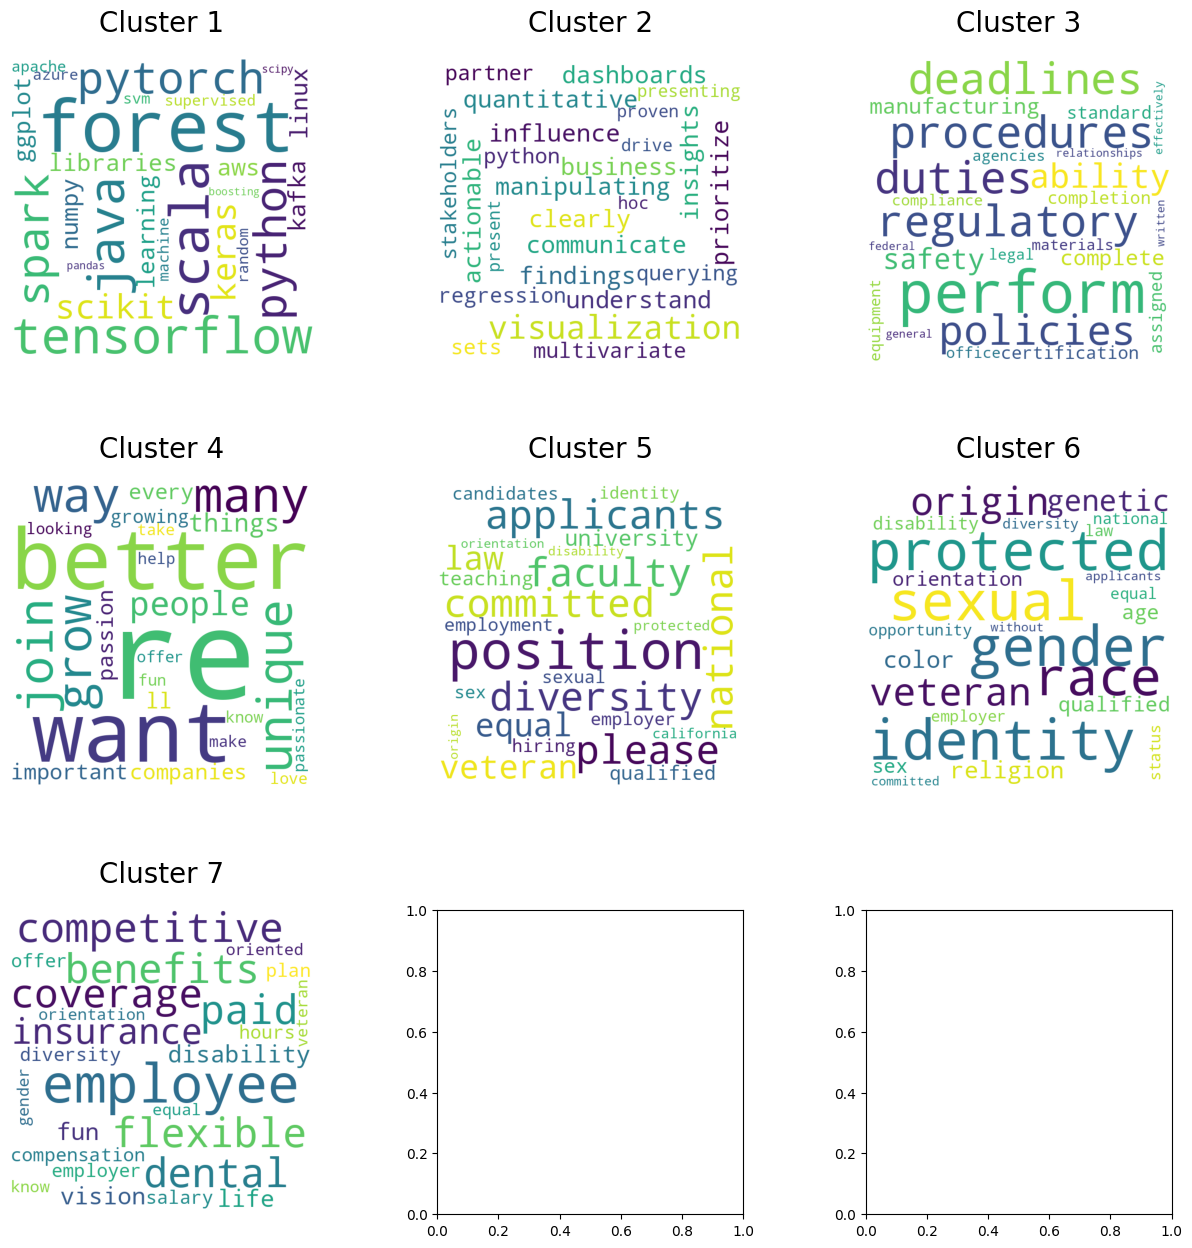

In [149]:

from wordcloud import WordCloud
import matplotlib.pyplot as plt

############
fig, axs = plt.subplots(3, 3, figsize=(15,15))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
axs = axs.ravel()
#####################

# create a WordCloud fro each cluster and plot
for i in range(number_of_topics):
    
    topic_text =" ".join(topic_words[i]) #join the words of each cluster 
    wordcloud = WordCloud(width=600, height=600, background_color='white', max_words=25, contour_width=3, contour_color='steelblue').generate(topic_text)
    axs[i].imshow(wordcloud)
    axs[i].set_title(f"Cluster {i+1}", fontsize=20, pad=20)
    axs[i].axis('off')
    
plt.show()

# Skills missing in resume

In [ ]:
from bs4 import BeautifulSoup
import re

#Remove newline charaters and non-text characters nad numericals from each column 
#Read the resume content.
with open('/content/sample_data/resume.txt', 'r') as file:
    resume = file.read()
    # Parse it using Beautiful Soup
    soup = BeautifulSoup(resume, 'html.parser')
    uls = soup.find_all('ul')    #find unordered lists
    content = ''                 # create a empty string to join all listed content per posting
    if not uls:                  #Some posts DO NOT have listed content 
      content=soup.get_text(separator=' ')
    else:
      for ul in uls:
        lis = ul.find_all('li') #list items within an ordered or unordered list
        for li in lis:
          text = li.get_text(separator=' ')
          content =content +' '+ text
resume_listed_content=content
resume_listed_content=str(resume_listed_content).replace('\n', ' ').replace('-', ' ').strip().lower()
resume_listed_content=re.sub(r'[^\w\s]|[\d]', ' ', resume_listed_content)


In [ ]:
resume_listed_content

'experience     developed probability simulations using numpy     assessed online ad clicks for statistical significance using permutation testing     analyzed disease outbreaks using common clustering algorithms   additional skills     data visualization using matplotlib     statistical analysis using scipy     processing structured tables using pandas     executing k means clustering and dbscan clustering using scikit learn     extracting locations from text using geonamescache     location analysis and visualization using geonamescache and basemap     dimensionality reduction with pca and svd  using scikit learn     nlp analysis and text topic detection using scikit learn '

In [ ]:
resume_words_list=resume_listed_content.split()
resume_words_list

In [ ]:
topic_words=model.topic_words #topics (clusters) words list
topic_words

In [ ]:
required_skills=topic_words[0]
required_skills

array(['tensorflow', 'keras', 'scikit', 'python', 'pytorch', 'scala',
       'java', 'svm', 'random', 'spark', 'numpy', 'boosting', 'deep',
       'jupyter', 'neural', 'algorithms', 'kafka', 'scipy', 'learning',
       'linux', 'ggplot', 'nlp', 'hive', 'forest', 'machine', 'apache',
       'libraries', 'aws', 'forests', 'supervised', 'unsupervised',
       'object', 'plus', 'pandas', 'proficiency', 'matplotlib',
       'recognition', 'trees', 'such', 'frameworks', 'cloud', 'azure',
       'hadoop', 'strong', 'common', 'clustering', 'excellent',
       'experience', 'ml', 'sql'], dtype='<U14')

In [ ]:
#Find missing skills 
missing_skills=list(set(required_skills) - set(resume_words_list))
missing_skills

In [ ]:
#Find matching skills
matching_skills = set(required_skills).intersection(set(resume_words_list))
matching_skills